In [3]:
# Import the Pandas library
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Urban Heat Islands

This data tracks temperature measurements across different environments over time.

Here's a breakdown of what each column is showing:

- `timestamp`: This column provides the exact date and time, including the timezone offset (-05:00 indicating UTC-5, likely Central Daylight Time or Eastern Standard Time). The timestamps are recorded at one-minute intervals, indicating a detailed time-series observation of temperature changes.

- `urban_parking_lot_temperature`: This represents the temperature recorded in an urban parking lot. Parking lots, especially those made of asphalt or concrete, tend to absorb and retain a significant amount of solar radiation, often leading to higher temperatures compared to vegetated areas.

- `urban_park_temperature`: This indicates the temperature measured in an urban park. Parks, with their trees, grass, and open spaces, can help mitigate the urban heat island effect by providing shade and evapotranspiration, often resulting in cooler temperatures than surrounding built-up areas.

- `suburban_rural_temperature`: This column shows the temperature recorded in a suburban or rural area. These areas typically have more natural landscapes, less dense infrastructure, and more vegetation, which generally results in lower temperatures compared to dense urban environments.

In [ ]:
heat_island = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/chicago-urban-heat-island.csv')

# Electricity Grid Pricing

This data is real-time electricity market data from an Independent System Operator (ISO) or Regional Transmission Organization (RTO) called PJM Interconnection and the "PSEG" zone. This type of data is crucial for understanding the dynamics of electricity supply, demand, and grid conditions.

Here's a breakdown of what each column is showing:

- `datetime_beginning_utc`: This timestamp indicates the start time of the data record in Coordinated Universal Time (UTC). UTC is a global standard for time, which helps in synchronizing data from different regions.

- `datetime_beginning_ept`: This timestamp indicates the start time of the data record in Eastern Prevailing Time (EPT). EPT is the local time zone relevant to the electricity market operation (e.g., Eastern Time in the United States, which PJM Interconnection primarily operates in).

- `pnode_id`: This is a unique numerical identifier for a "Pricing Node" (PNode) within the electricity grid. A PNode is a specific location (e.g., a substation, generator, or load point) where electricity prices are calculated.

- `pnode_name`: This provides the human-readable name of the Pricing Node, making it easier to identify the specific location on the grid.

- `voltage`: This indicates the voltage level at the pricing node (e.g., 230 KV). Voltage levels are important for understanding the transmission network's capacity and characteristics.

- `zone`: This specifies the transmission zone or geographic region where the pricing node is located. "PSEG" refers to Public Service Enterprise Group, a utility operating within a larger electricity market's zone.

- `system_energy_price_rt`: This is the real-time system-wide energy price. It represents the base cost of electricity itself, before accounting for any transmission constraints or losses.

- `total_lmp_rt`: This stands for "Total Locational Marginal Price (Real-Time)." LMP is the price of electricity at a specific pricing node, reflecting not only the cost of energy but also the costs associated with transmission congestion and marginal losses at that location. It's the key price signal in many wholesale electricity markets.

- `congestion_price_rt`: This is the real-time component of the LMP that accounts for transmission congestion. Congestion occurs when the demand for transmission capacity exceeds the available capacity on a particular transmission line, leading to higher prices at certain locations. A negative value, indicates that the flow on a congested line is being reversed, which can lower prices at that node.

- `marginal_loss_price_rt`: This is the real-time component of the LMP that accounts for the cost of electricity lost during transmission. As electricity travels through power lines, some energy is dissipated as heat. This component reflects the cost of covering those losses at the margin.

In [ ]:
elec_grid_7_15 = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/electric%20grid/electric_grid_7_15_2024.csv')

In [ ]:
elec_grid_8_7 = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/electric%20grid/electric_grid_8_7_2024.csv')

In [ ]:
elec_grid_11_20 = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/electric%20grid/electric_grid_11_20_2024.csv')

# Smart Energy Plaza Solar

This data comes from a solar panel inverter at Argonne's Smart Energy Plaza, providing insights into the real-time performance of a photovoltaic (PV) system. An inverter's primary role is to convert the direct current (DC) electricity produced by solar panels into alternating current (AC) electricity suitable for grid consumption or household use.

Here's an explanation of each column:

- `datetimestamp`: This column records the exact date and time when the measurements were taken. It allows for tracking the solar panel system's operational parameters over time.

- `PhV` (Phase Voltage): This likely represents the Alternating Current (AC) voltage output by the inverter. Values around 237.2 V are typical for single-phase AC electricity supply in many residential or commercial settings (e.g., a nominal 240V system).

- `phA` (Phase Amperage): This denotes the Alternating Current (AC) flowing from the inverter. It indicates the amount of electrical current being supplied to the load or the grid.

- `StVA` (Apparent Power): Refers to "Apparent Power" in Volt-Amperes (VA). Apparent power is the product of voltage and current in an AC circuit, encompassing both real power (W) and reactive power. It gives a complete picture of the total electrical power in the circuit, regardless of its usability for work.

- `W` (Real Power): This represents the "Real Power" or active power, measured in Watts. This is the actual electrical power being produced by the inverter that can do useful work (e.g., power appliances, or be fed into the grid).

- `DCV` (DC Voltage): This is the Direct Current (DC) voltage measured on the input side of the inverter, directly from the solar panel array. It indicates the electrical potential supplied by the solar panels.

- `DCA` (DC Amperage): This is the Direct Current (DC) flowing from the solar panel array into the inverter. It represents the amount of current generated by the solar panels.

In [ ]:
smart_energy_plaza_solar = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/smart%20energy%20plaza/smart_energy_plaza_solar.csv')

# Battery Degradation

This data is a record of different mechanisms of capacity loss in a battery over time. Each column represents a specific aspect of degradation, and the values indicate the amount of capacity lost due to that mechanism.

Here's a breakdown of what each column is showing:

- `Time [s]`: This column represents the time elapsed in seconds. It allows you to track how the various capacity loss mechanisms evolve over the duration of the experiment or operation.

- `Loss of capacity to negative SEI [A.h]`: This indicates the capacity lost due to the formation of a Solid Electrolyte Interphase (SEI) layer on the negative electrode. The SEI layer is a passivation layer that forms on the electrode surface during the first charge, and its continued growth can consume active lithium ions, leading to capacity fade. The unit 'A.h' (Ampere-hour) quantifies the amount of electric charge, which directly relates to battery capacity.

- `Loss of capacity to positive SEI [A.h]`: Similar to the negative SEI, this column represents the capacity lost due to SEI formation on the positive electrode. While SEI formation is more commonly associated with the negative electrode, it can also occur on the positive electrode, contributing to capacity degradation.

- `Loss of capacity to positive SEI on cracks [A.h]`: This specifically measures the capacity loss due to SEI formation on cracks that may develop on the positive electrode. Cracks can expose new surfaces for SEI growth, accelerating capacity fade.

- `Loss of capacity to positive lithium plating [A.h]`: This column quantifies the capacity lost due to the undesirable process of lithium plating on the positive electrode. Lithium plating occurs when lithium ions deposit as metallic lithium on the electrode surface instead of intercalating into the electrode material, leading to irreversible capacity loss and potential safety issues.

In [ ]:
batteries = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Argonne%20Datasets/batteries/degradation_model_capacity_loss_200_cycles_sim3.csv')

# Titanic Disaster

| Variable | Definition | Key |
|---|---|---|
| survived | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| name | Name
| sex | Sex | |
| age | Age | Age in years |
| sib_sp | # of siblings / spouses aboard the Titanic | |
| par_ch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [34]:
titanic = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/titanic.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

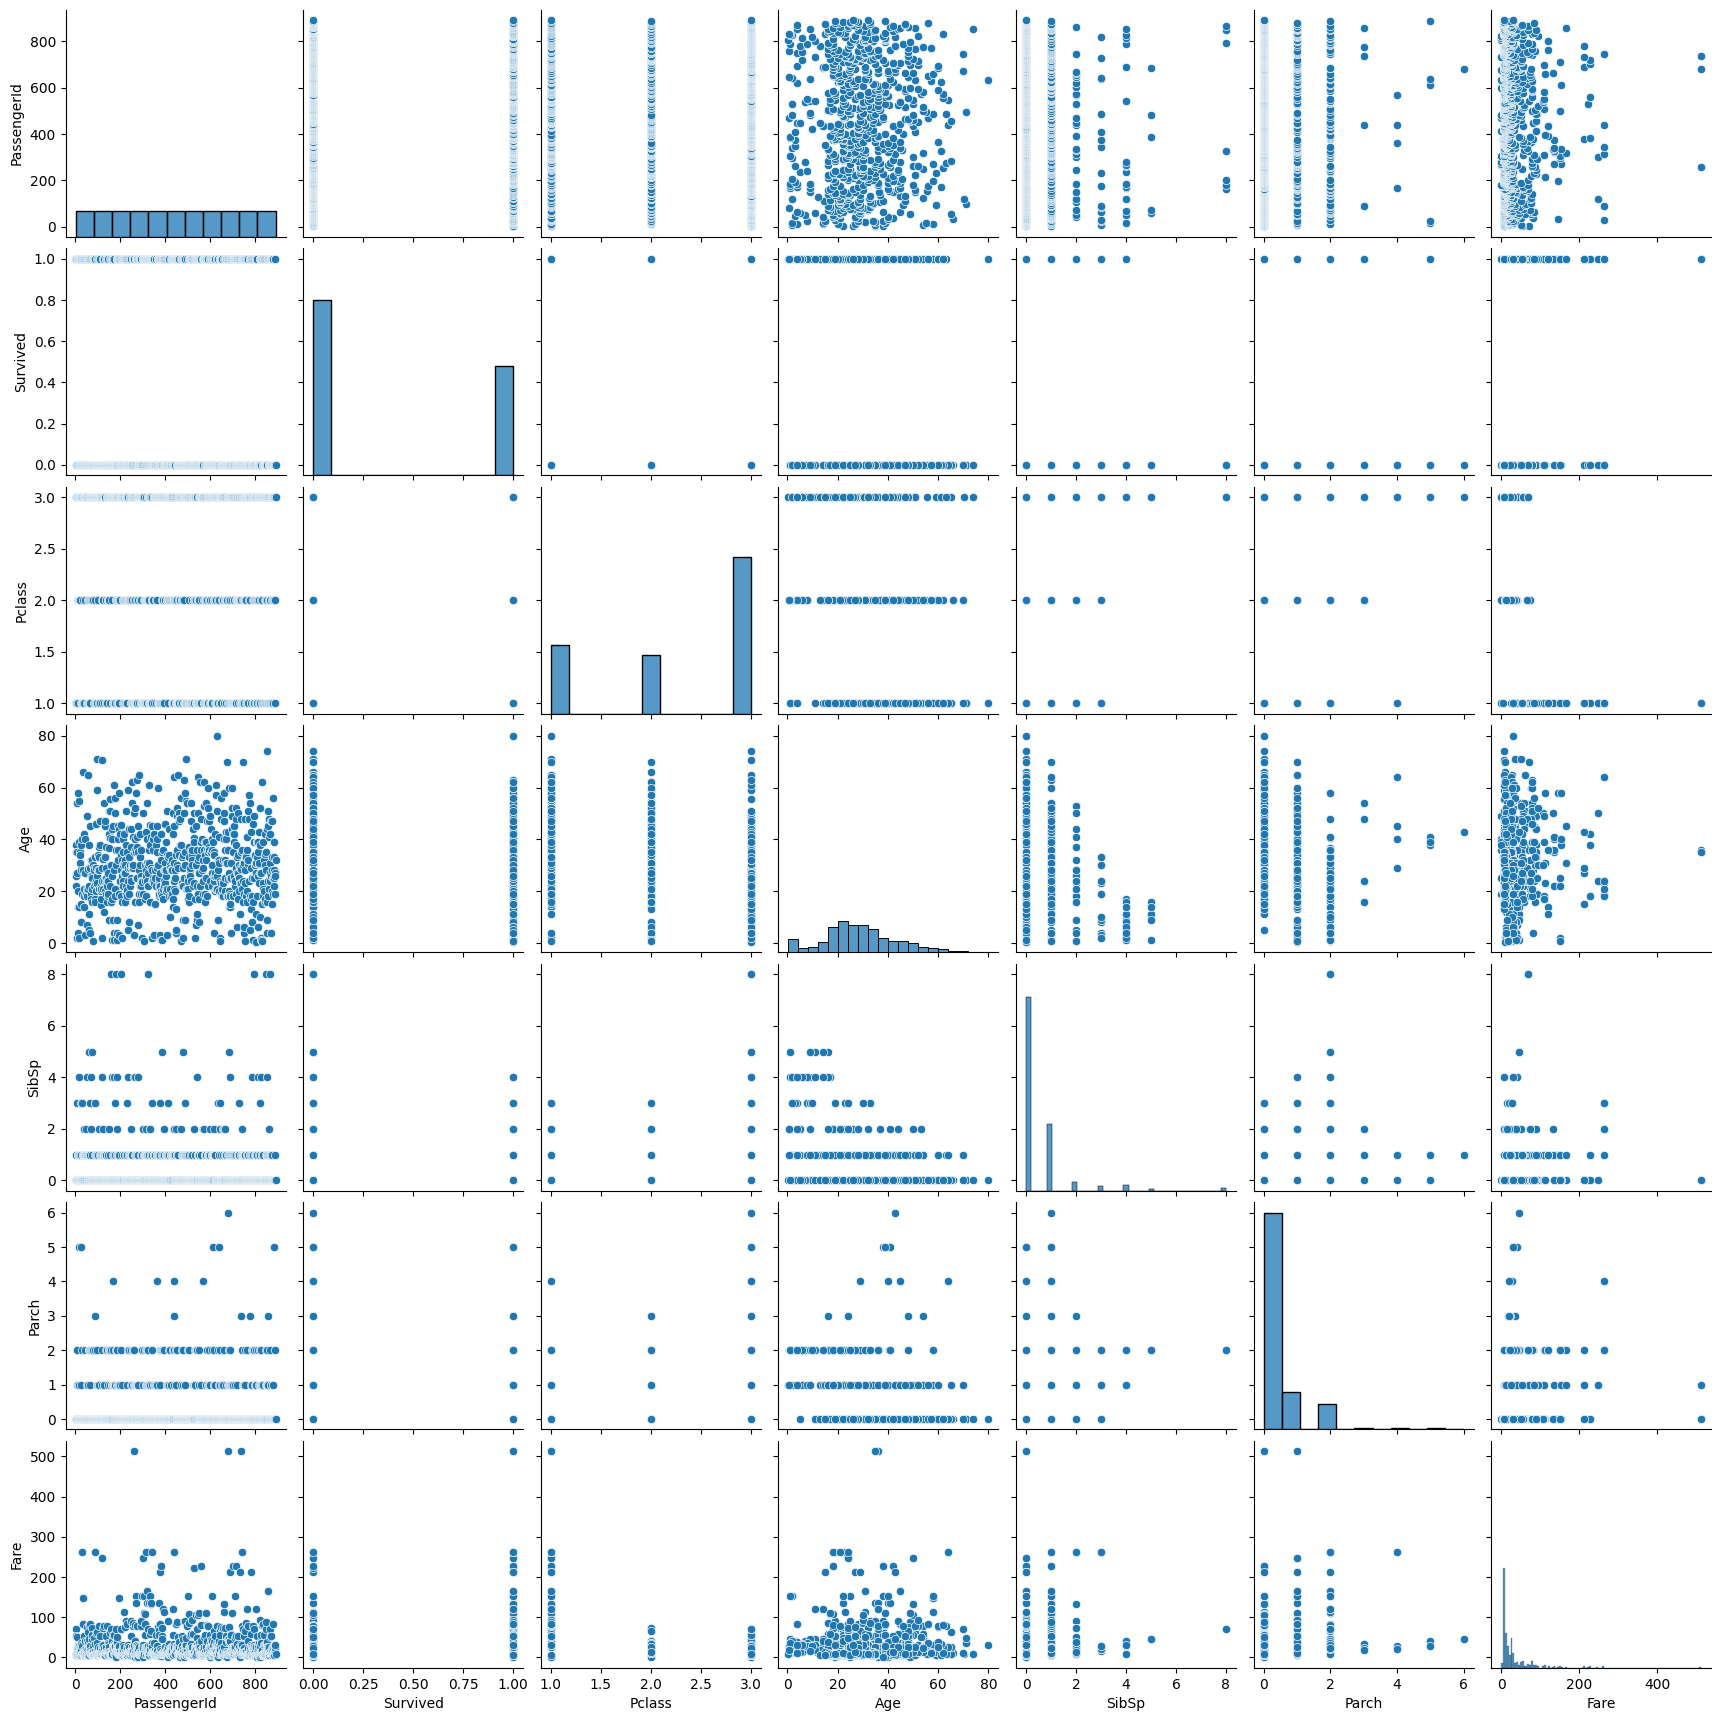

In [35]:
sns.pairplot(titanic)
plt.show

# Covid in Chicago

In [4]:
covid = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/Chicago_Demographic_Covid_Full.csv')

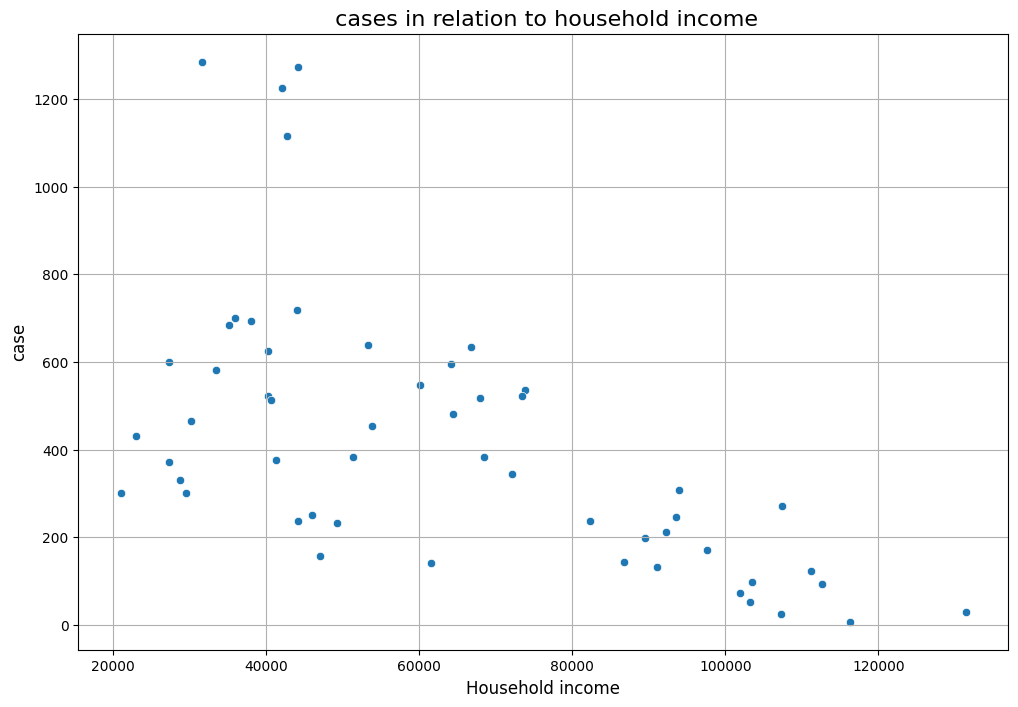

 -0.60


In [14]:
plt.figure(figsize=(12, 8))
# YOUR CODE HERE
sb.scatterplot(data=covid, x='MEDINC', y='CASE_5_1')
plt.title(' cases in relation to household income', fontsize=16)
plt.xlabel('Household income', fontsize=12)
plt.ylabel('case', fontsize=12)
plt.grid(True)
plt.show()
correlation = covid['MEDINC'].corr(covid['CASE_5_1'])
print(f" {correlation:.2f}")

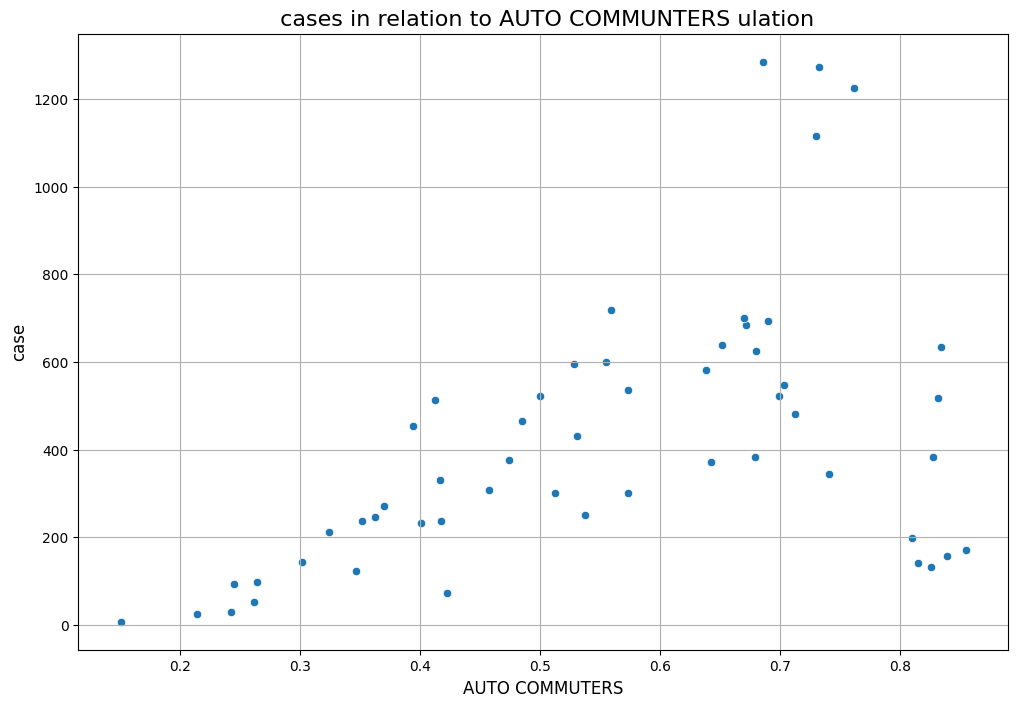

 0.50


In [22]:
plt.figure(figsize=(12, 8))
# YOUR CODE HERE
sb.scatterplot(data=covid, x='PERAUTO', y='CASE_5_1')
plt.title(' cases in relation to AUTO COMMUNTERS ulation', fontsize=16)
plt.xlabel('AUTO COMMUTERS', fontsize=12)
plt.ylabel('case', fontsize=12)
plt.grid(True)
plt.show()
correlation = covid['PERAUTO'].corr(covid['CASE_5_1'])
print(f" {correlation:.2f}")

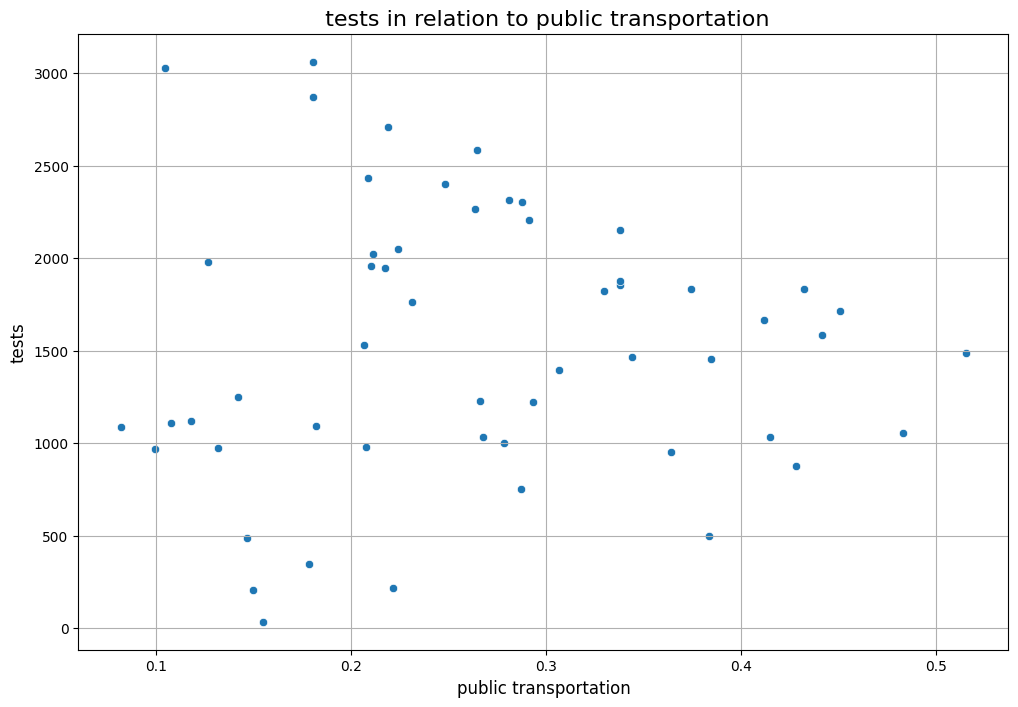

 0.02


In [17]:
plt.figure(figsize=(12, 8))
# YOUR CODE HERE
sb.scatterplot(data=covid, x='PERTRAN', y='TEST_5_1')
plt.title(' tests in relation to public transportation', fontsize=16)
plt.xlabel('public transportation', fontsize=12)
plt.ylabel('tests', fontsize=12)
plt.grid(True)
plt.show()
correlation = covid['PERTRAN'].corr(covid['TEST_5_1'])
print(f" {correlation:.2f}")

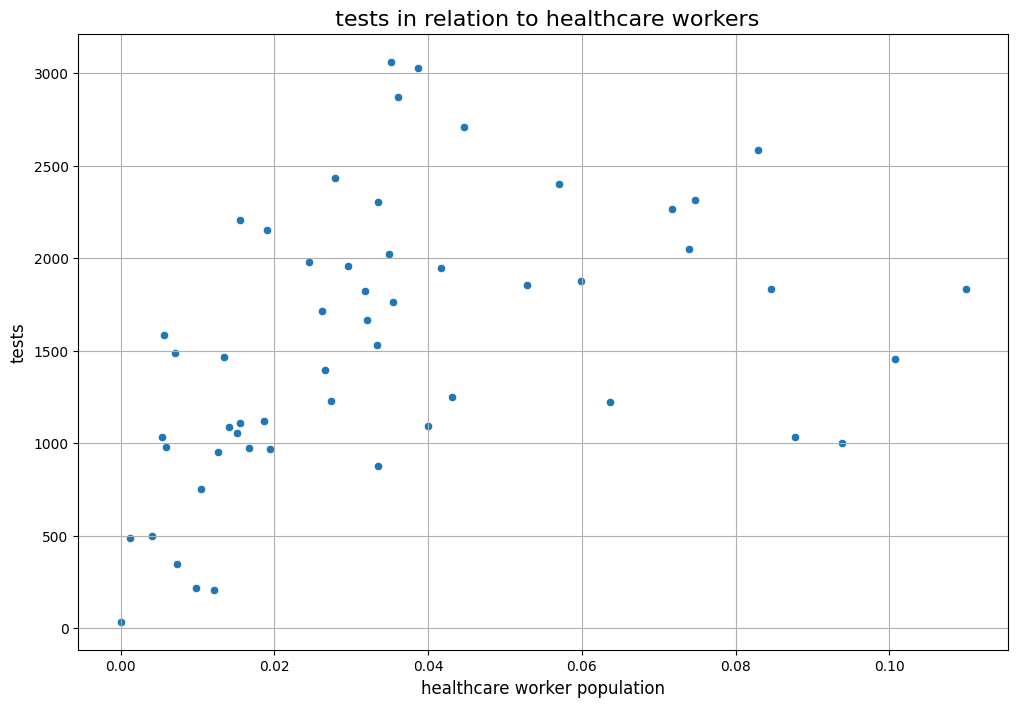

 0.41


In [18]:
plt.figure(figsize=(12, 8))
# YOUR CODE HERE
sb.scatterplot(data=covid, x='PERHSRV', y='TEST_5_1')
plt.title(' tests in relation to healthcare workers', fontsize=16)
plt.xlabel('healthcare worker population', fontsize=12)
plt.ylabel('tests', fontsize=12)
plt.grid(True)
plt.show()
correlation = covid['PERHSRV'].corr(covid['TEST_5_1'])
print(f" {correlation:.2f}")

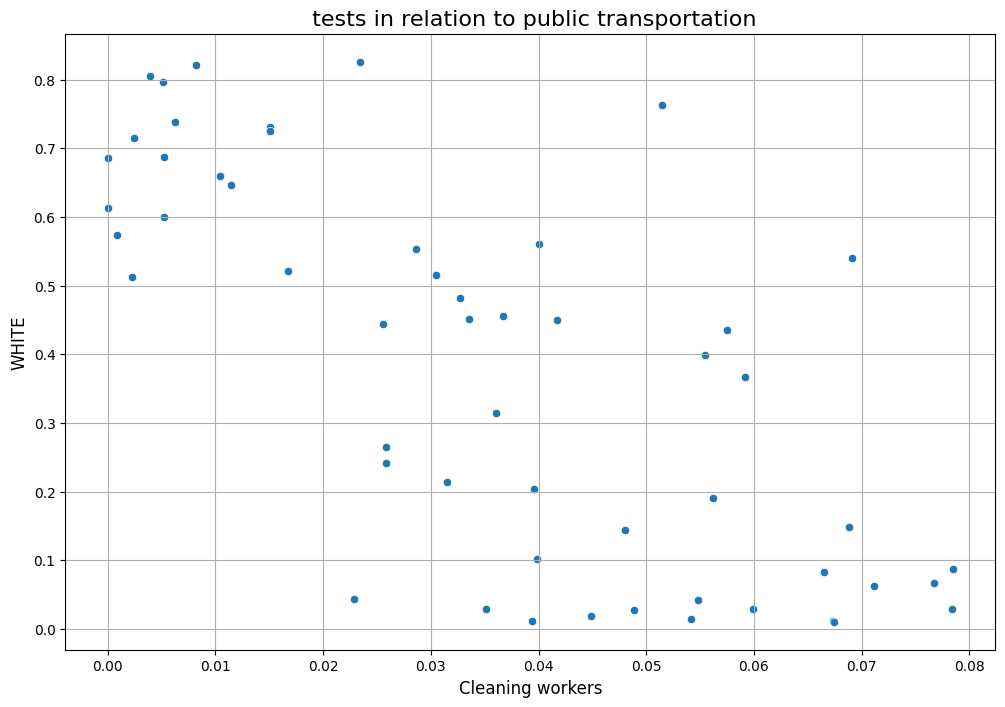

 -0.72


In [21]:
plt.figure(figsize=(12, 8))
# YOUR CODE HERE
sb.scatterplot(data=covid, x='PERCLEAN', y='PERW')
plt.xlabel('Cleaning workers', fontsize=12)
plt.ylabel('WHITE', fontsize=12)
plt.grid(True)
plt.show()
correlation = covid['PERCLEAN'].corr(covid['PERW'])
print(f" {correlation:.2f}")

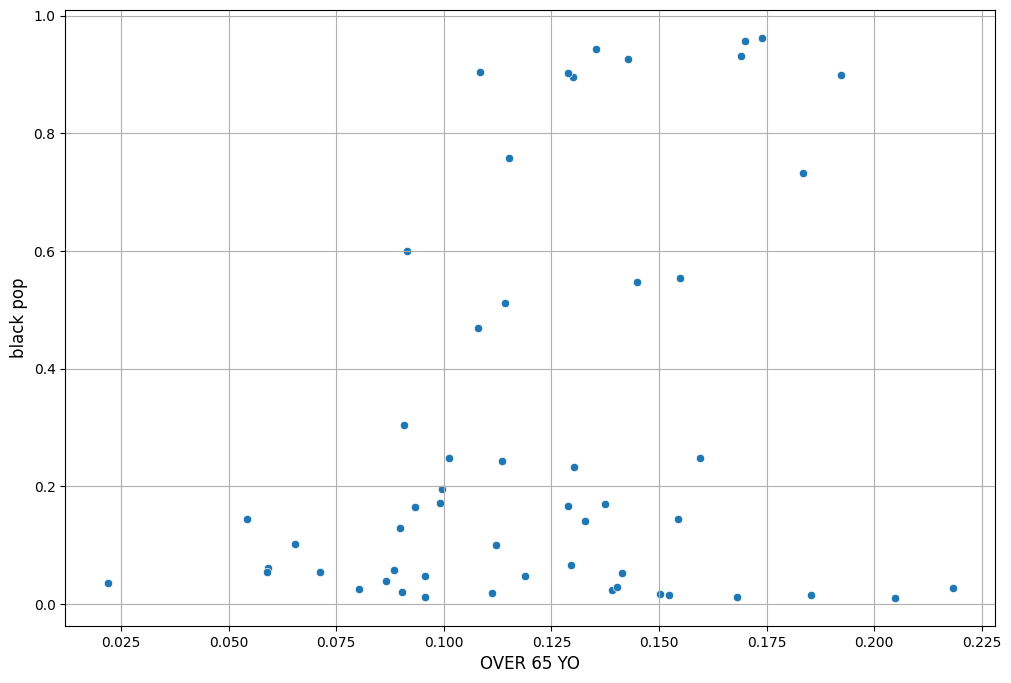

 0.31


In [27]:
plt.figure(figsize=(12, 8))```````````````````
# YOUR CODE HERE
sb.scatterplot(data=covid, x='PER65', y='PERBLK')
plt.xlabel('OVER 65 YO', fontsize=12)
plt.ylabel('black pop', fontsize=12)
plt.grid(True)
plt.show()
correlation = covid['PER65'].corr(covid['PERBLK'])
print(f" {correlation:.2f}")

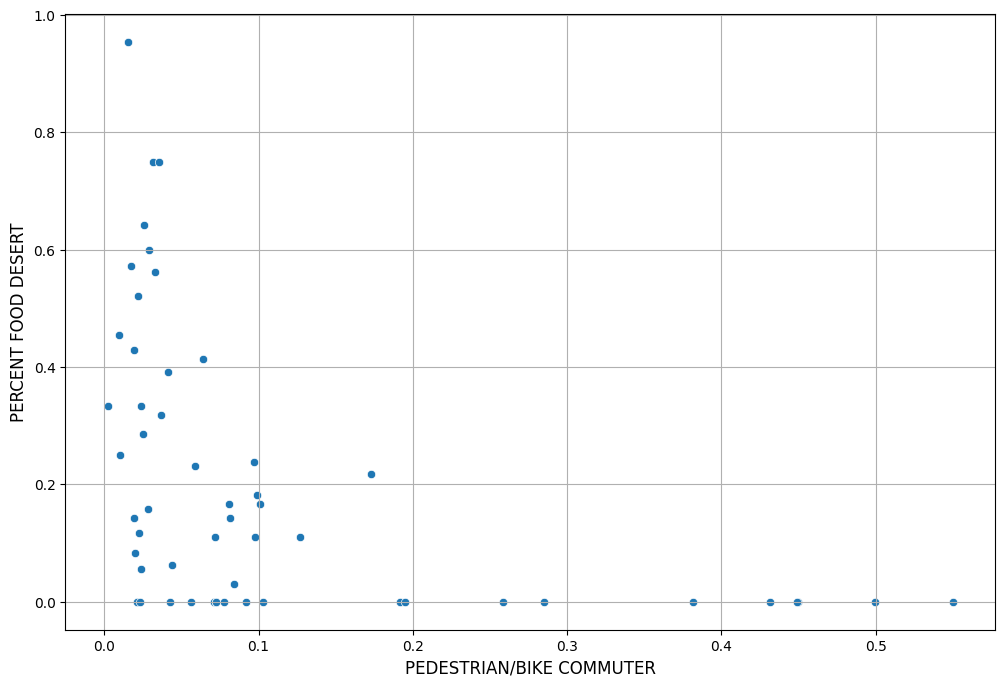

 -0.45


In [28]:
plt.figure(figsize=(12, 8))
# YOUR CODE HERE
sb.scatterplot(data=covid, x='PERPEDB', y='FDTRTPER')
plt.xlabel('PEDESTRIAN/BIKE COMMUTER', fontsize=12)
plt.ylabel('PERCENT FOOD DESERT', fontsize=12)
plt.grid(True)
plt.show()
correlation = covid['PERPEDB'].corr(covid['FDTRTPER'])
print(f" {correlation:.2f}")

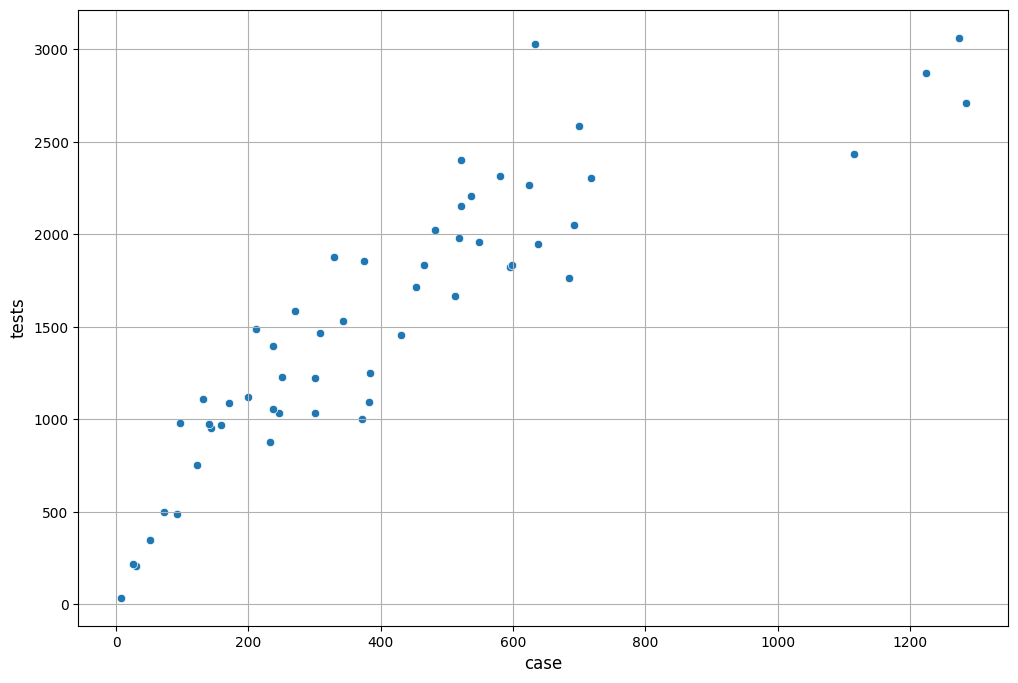

 0.88


In [30]:
plt.figure(figsize=(12, 8))
# YOUR CODE HERE
sb.scatterplot(data=covid, x='CASE_5_1', y='TEST_5_1')
plt.xlabel('case', fontsize=12)
plt.ylabel('tests', fontsize=12)
plt.grid(True)
plt.show()
correlation = covid['CASE_5_1'].corr(covid['TEST_5_1'])
print(f" {correlation:.2f}")

**Population**

`POP`: Total population

`POPDENS`: Population density (per square meter)

`P0_44`: Number of people ages 0 to 44

`P45_64`: Number of people ages 45 to 64:

`P65_`: Number of people ages 65 and older

<p>&nbsp;</p>

**Socio-economic status**

`MEDINC`: Median household income

`PERNOINS`: Percent without health insurance

<p>&nbsp;</p>

**Racial/Ethnic neighbourhood types**

`PERBLK`: Percent of population that is Black  

`PERHISP`: Percent of population that is Hispanic  

`PERW`: Percent of population that is White

`PERASN`: Percent of population that is Asian

<p>&nbsp;</p>

**Occupations**

`PEROFFTC`: Percent office and telecommute workers

`PERHSRV`: Percent healthcare service workers

`PERPSRV`: Percent public service workers

`PERFOOD`: Percent food service workers

`PERCLEAN`: Percent cleaning service workers

<p>&nbsp;</p>

**How people get to work**

`PERAUTO`: Percent personal automobile commuters

`PERTRAN`: Percent public transportation commuters

`PERPEDB`: Percent pedestrian and bike commuters

`PERTELE`: Percent telecommuters (work from home)


<p>&nbsp;</p>

**Built environments**

`FDTRTPER`: Percent food desert tracts

`WS_5`: Hospital accessibility score (lower score = hospitals are farther away)

`POPDENS`: Population density (per square meter)  

`PERCROWD`: Percent housing units w/ > 1 person per room


<p>&nbsp;</p>

**COVID-19**

`CASE5_1`: Cases, total (5/1):

`TEST5_1`: Tests, total (5/1)


# CO2 Levels in Classrooms

This dataset was collected by students at J. Sterling Morton High School as part of a study on CO2 levels in classrooms.

In [ ]:
co2_classroom = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/ai-for-science-teacher-institute/refs/heads/main/Week%203/data/co2_levels_and_people.csv')

# Does Homework Really Impact Achievement?

What is the relationship between the amount of time students spend on homework and their academic achievement? We'll use a real-world dataset to explore this question and visualize our findings.

The data for this investigation comes from the [Early Childhood Longitudinal Study, (ECLS)](https://nces.ed.gov/ecls/), a large-scale study conducted by the U.S. National Center for Education Statistics. This study tracks students from kindergarten through elementary school, collecting rich information about their development, learning experiences, and family backgrounds. Our subset of this data includes details on student demographics, homework habits, and standardized achievement scores in subjects like math and reading.

In [5]:
homework = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/ai-for-science-teacher-institute/refs/heads/main/Week%202/data/ecls_homework_dataset.csv')

### Dataset Key

- `student_id`: A unique identifier for each student in the dataset.

- `grade`: The student's grade level, numerically coded (e.g., 0 for Kindergarten, 1 for 1st Grade, 2 for 2nd Grade).

- `ses_level`: Socioeconomic status level of the student's family (specific categories for this variable are not detailed in this dataset snippet, but it generally indicates economic background).

- `homework_category`: A categorical representation of homework time assigned or completed. The original values were mapped as follows (though the homework_minutes column already contains the converted numeric values):

  - `1`: No homework assigned
  - `2`: Less than 30 minutes
  - `3`: 30-60 minutes
  - `4`: 1-2 hours
  - `5`: More than 2 hours

`homework_minutes`: The numeric conversion of homework time in minutes per day, derived from homework_category.

`math_score`: The student's achievement score in Math.

`reading_score`: The student's achievement score in Reading.

`grade_label`: A categorical label for the student's grade (e.g., 'Kindergarten', '1st Grade', '2nd Grade').

`homework_label`: A categorical label for the homework time (e.g., 'No homework', 'Less than 30 min').

In [27]:
homework['math_grade'] = np.where(homework['math_score'] > 89, "A", np.where(homework['math_score'] > 79, "B", np.where(homework['math_score'] > 69, 'C', np.where(homework['math_score'] > 59, "D", "F"))))
y = homework['math_grade']

features = ['grade', 'homework_minutes', 'ses_level']
X = homework[features]

X.head(20)


,grade,homework_minutes,ses_level
0,2,0,3
1,5,90,3
2,4,15,2
3,3,15,2
4,0,15,2
5,0,15,2
6,0,15,3
7,5,45,1
8,3,45,1
9,4,90,1


Training set shape: (12721, 3)
Validation set shape: (3635, 3)
Test set shape: (1818, 3)


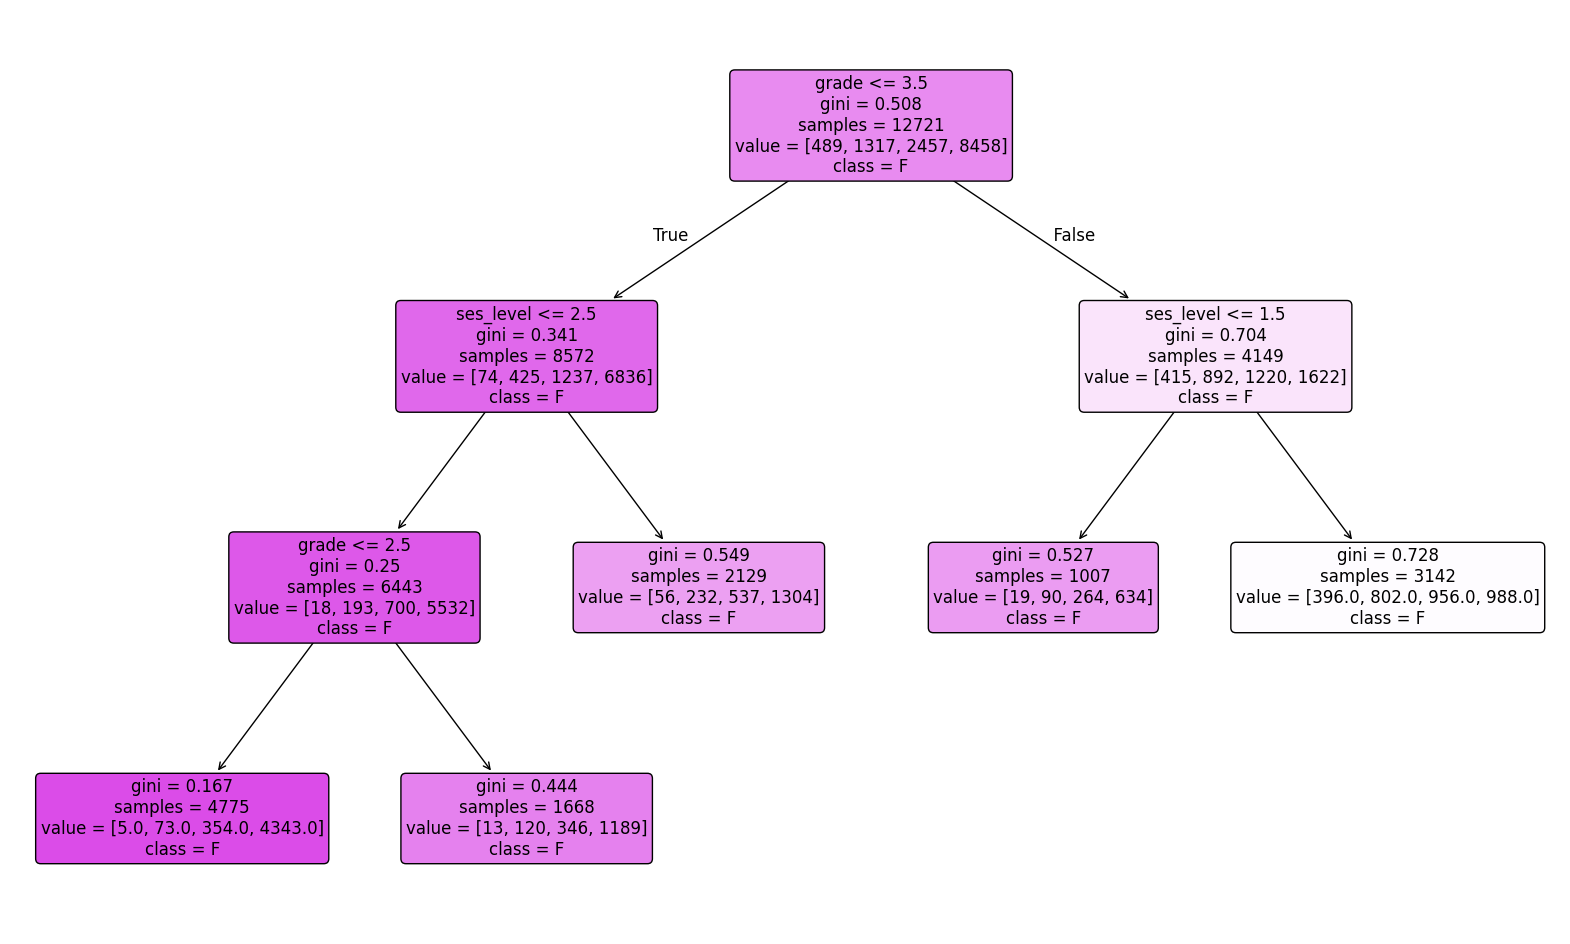

Accuracy for a tree with 5 leaves: 0.6649


In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = (1/3), random_state = 1, stratify = y_temp)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

simple_model = DecisionTreeClassifier(max_leaf_nodes= 5, random_state = 1)

# Train the model on our training data
# YOUR CODE HERE
simple_model.fit(X_train, y_train)

# Let's visualize the tree!
plt.figure(figsize=(20, 12))
plot_tree(simple_model,
          feature_names=features,
          class_names=sorted(y.unique()),
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()
val_predictions = simple_model.predict(X_val)
accuracy= accuracy_score(y_val, val_predictions)

print(f"Accuracy for a tree with 5 leaves: {accuracy:.4f}")

Max leaf nodes: 5 		 Validation Accuracy: 0.6649
Max leaf nodes: 15 		 Validation Accuracy: 0.6869
Max leaf nodes: 25 		 Validation Accuracy: 0.6842
Max leaf nodes: 35 		 Validation Accuracy: 0.6836
Max leaf nodes: 45 		 Validation Accuracy: 0.6823
Max leaf nodes: 55 		 Validation Accuracy: 0.6817
Max leaf nodes: 65 		 Validation Accuracy: 0.6817
Max leaf nodes: 75 		 Validation Accuracy: 0.6817
Max leaf nodes: 85 		 Validation Accuracy: 0.6817
Max leaf nodes: 95 		 Validation Accuracy: 0.6817
Max leaf nodes: 105 		 Validation Accuracy: 0.6817
Max leaf nodes: 115 		 Validation Accuracy: 0.6817
Max leaf nodes: 125 		 Validation Accuracy: 0.6817
Max leaf nodes: 135 		 Validation Accuracy: 0.6817
Max leaf nodes: 145 		 Validation Accuracy: 0.6817
Max leaf nodes: 155 		 Validation Accuracy: 0.6817
Max leaf nodes: 165 		 Validation Accuracy: 0.6817
Max leaf nodes: 175 		 Validation Accuracy: 0.6817
Max leaf nodes: 185 		 Validation Accuracy: 0.6817
Max leaf nodes: 195 		 Validation Accuracy

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

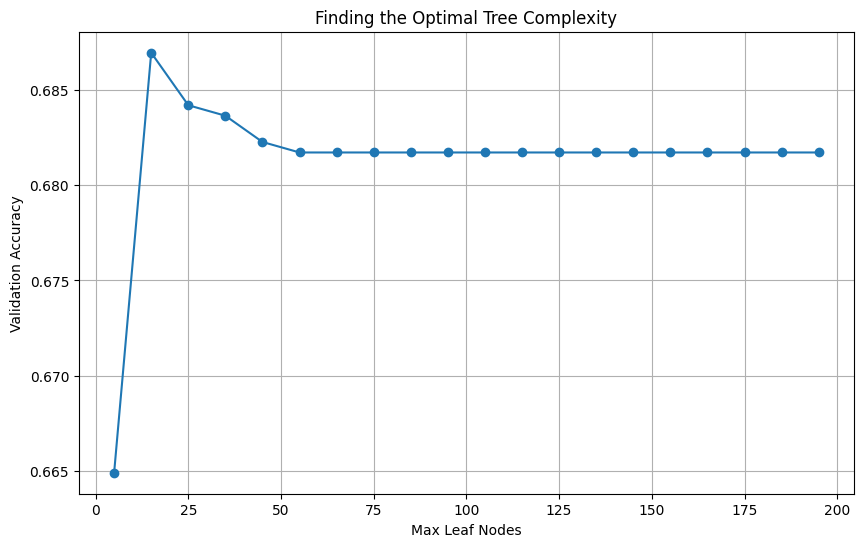

In [20]:
# Define a range of leaf node values to test
candidate_max_leaf_nodes = list(range(5, 201, 10))
validation_scores = {}

for leaf_nodes in candidate_max_leaf_nodes:
    # Create and train the model
    model = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes, random_state=1)
    model.fit(X_train, y_train)

    # Get predictions and score
    val_preds = model.predict(X_val)
    score = accuracy_score(y_val, val_preds)

    # Store the score
    validation_scores[leaf_nodes] = score

    print(f"Max leaf nodes: {leaf_nodes} \t\t Validation Accuracy: {score:.4f}")

    plt.figure(figsize=(10, 6))
plt.plot(list(validation_scores.keys()), list(validation_scores.values()), marker='o')
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Validation Accuracy")
plt.title("Finding the Optimal Tree Complexity")
plt.grid(True)
plt.show()

In [ ]:
# Define a range of leaf node values to test
candidate_max_leaf_nodes = list(range(5, 201, 10))
validation_scores = {}

for leaf_nodes in candidate_max_leaf_nodes:
    # Create and train the model
    model = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes, random_state=1)
    model.fit(X_train, y_train)

    # Get predictions and score
    val_preds = model.predict(X_val)
    score = accuracy_score(y_val, val_preds)

    # Store the score
    validation_scores[leaf_nodes] = score

    print(f"Max leaf nodes: {leaf_nodes} \t\t Validation Accuracy: {score:.4f}")

    plt.figure(figsize=(10, 6))
plt.plot(list(validation_scores.keys()), list(validation_scores.values()), marker='o')
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Validation Accuracy")
plt.title("Finding the Optimal Tree Complexity")
plt.grid(True)
plt.show()

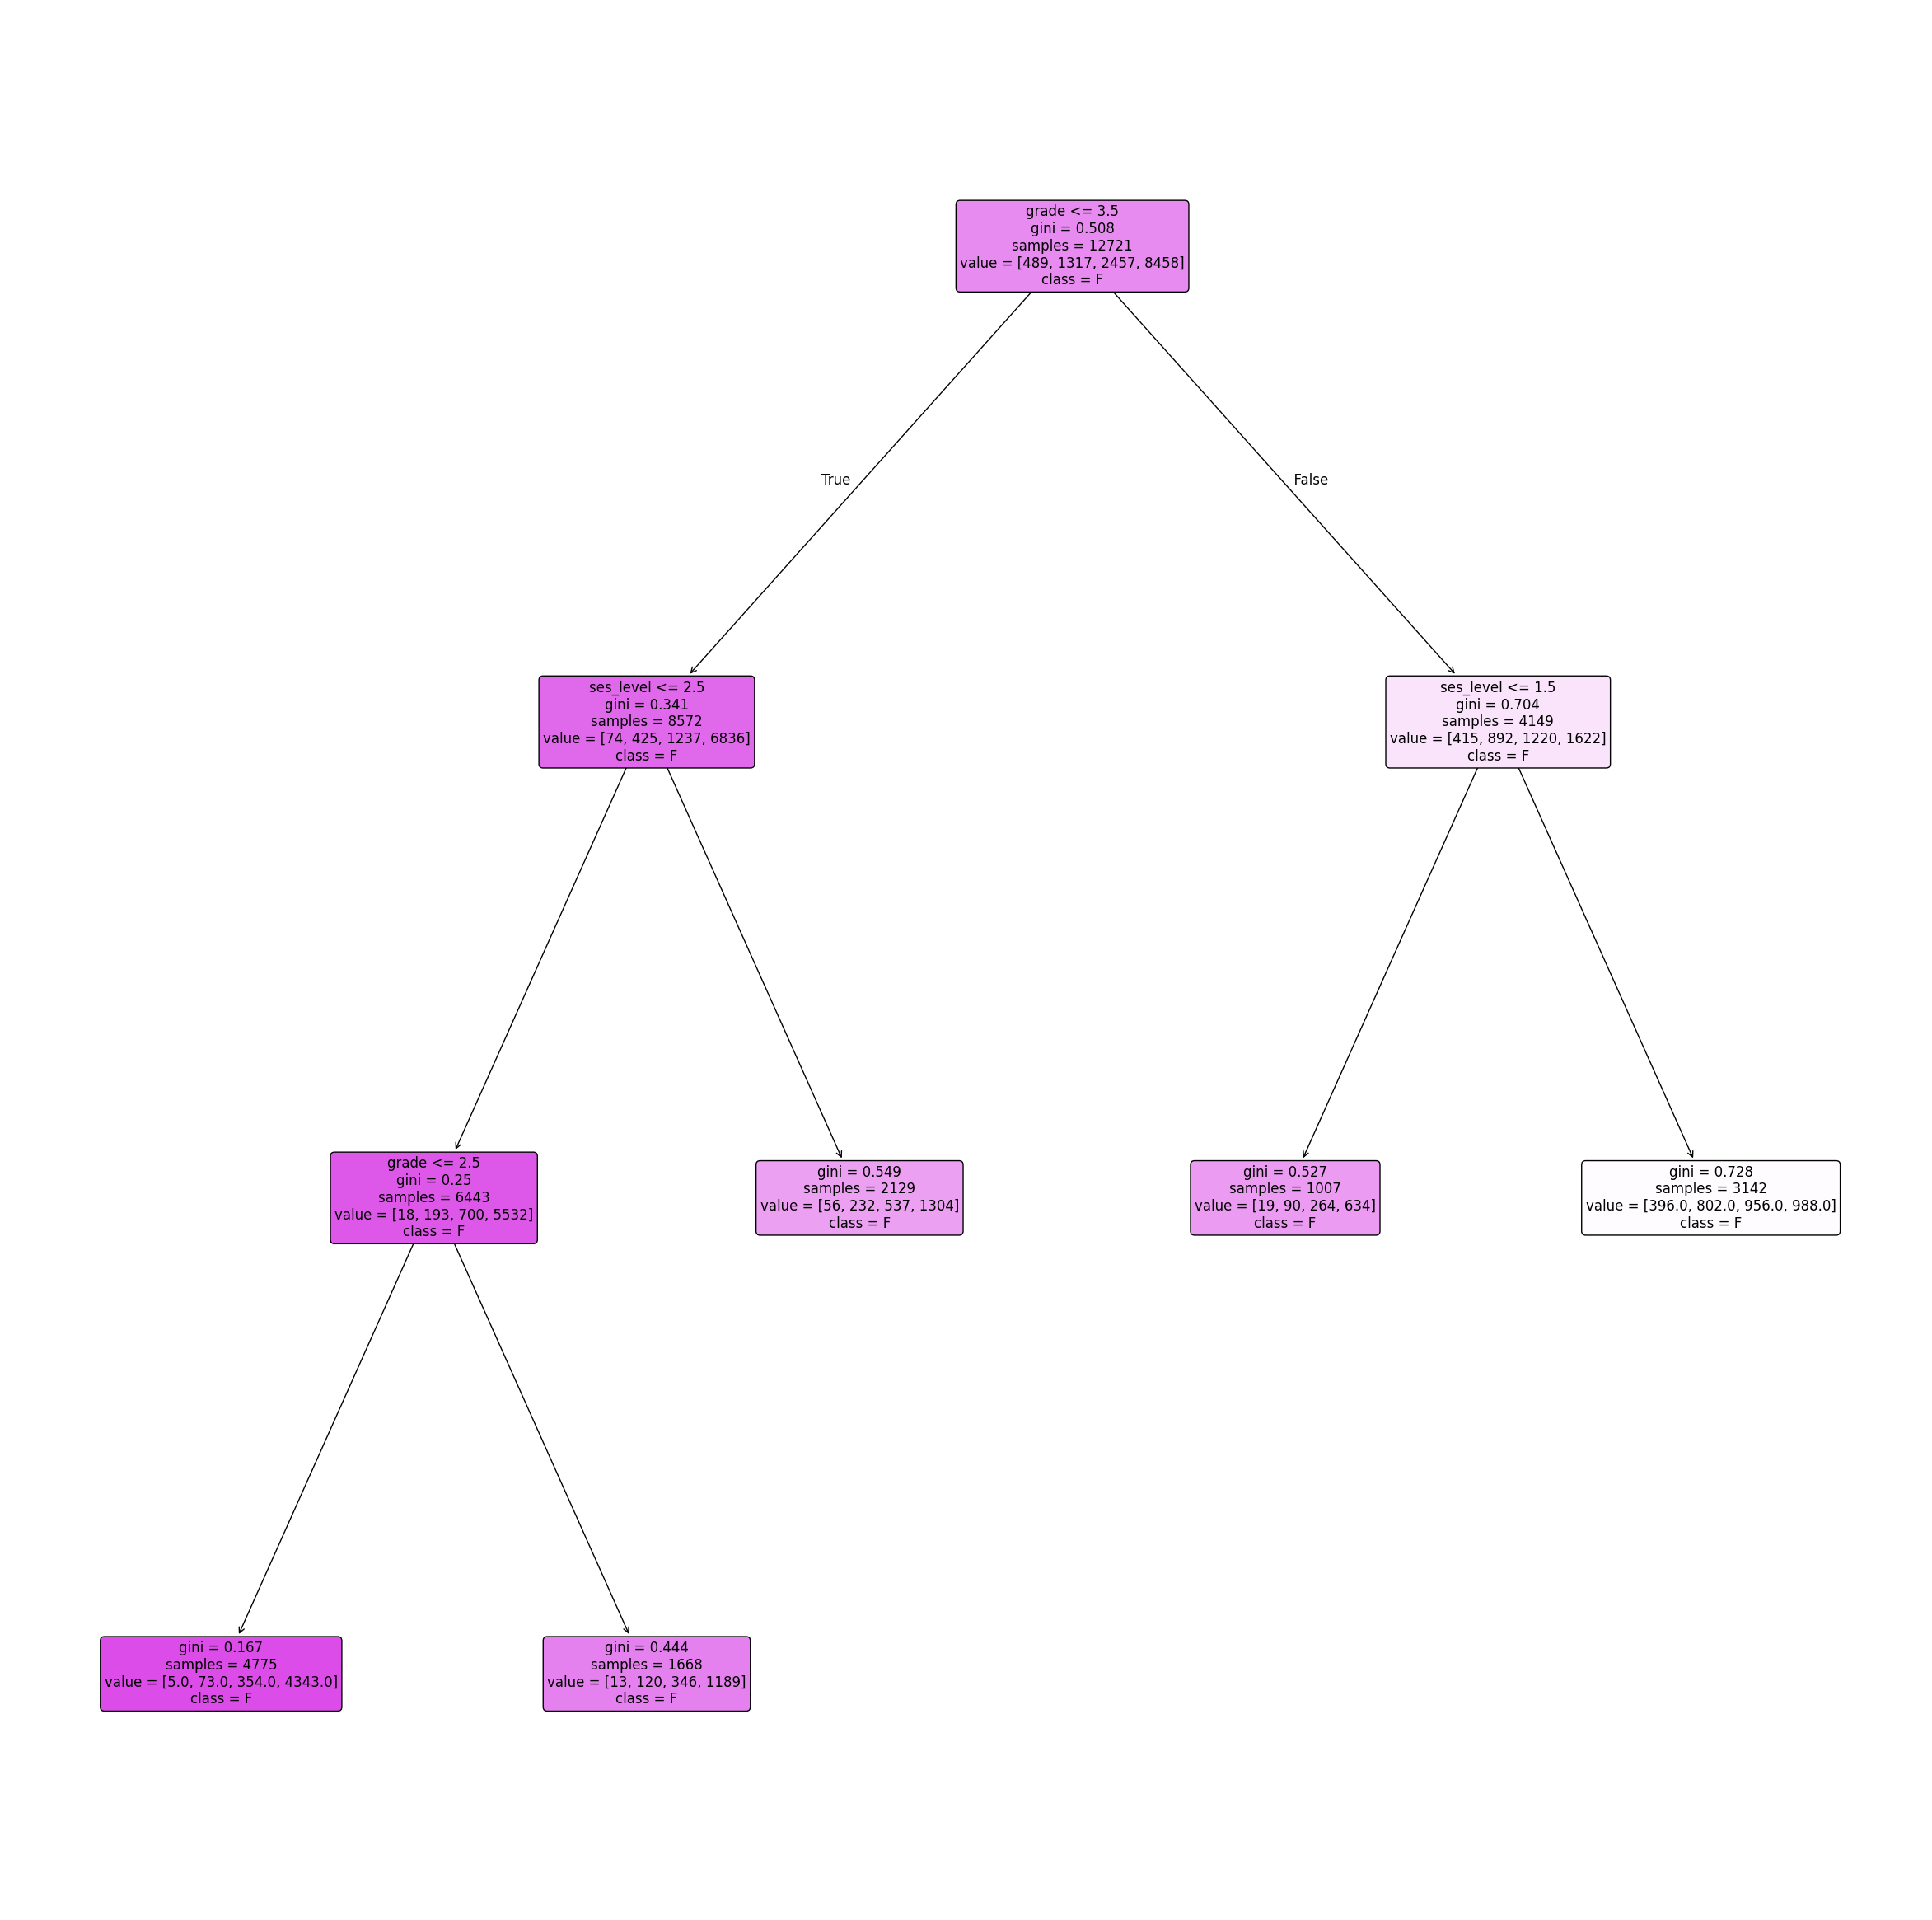

Accuracy for a tree with 15 leaves: 0.664924346629986
Final Accuracy on the unseen Test Set: 0.6815


In [31]:
model_leaves = DecisionTreeClassifier(max_leaf_nodes = 15, random_state = 1, min_samples_leaf=5, max_depth = 2)
plt.figure(figsize=(30, 30))
plot_tree(simple_model,
          feature_names=features,
          class_names=sorted(y.unique()),
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

# Train it on the training data
# YOUR CODE HERE
model_leaves.fit(X_train, y_train)

# Get predictions on the validation data
# YOUR CODE HERE
val_predictions = model_leaves.predict(X_val)

# Check the accuracy
# YOUR CODE HERE
accuracy = accuracy_score(y_val, val_predictions)
print(f"Accuracy for a tree with 15 leaves: {accuracy:.15f}")

# Find the best number of leaf nodes from our loop of different max_leaf_nodes
best_tree_size = 15

# Create and train the final model using the best parameter
final_model = DecisionTreeClassifier(max_leaf_nodes=best_tree_size, random_state=1, min_samples_leaf=30)
final_model.fit(X_train, y_train)

# Get predictions on the test set (the data we've never touched before)
test_preds = final_model.predict(X_test)

# Calculate the final accuracy score
final_accuracy = accuracy_score(y_test, test_preds)

print(f"Final Accuracy on the unseen Test Set: {final_accuracy:.4f}")